In [57]:
require(tidyverse)
require(ggplot2)
require(data.table)
require(viridis)
require(patchwork)
library(ggrastr)

In [4]:
df<-read.csv("06_B_cell_flow/density_data_CD27neg.csv")
iso_percentage<-read.csv("06_B_cell_flow/iso.perc.eff.csv")

In [21]:
iso_percentage

X,isotype,group,timepoint,N,P
<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1,IgD,BR2,day7,719,29.9583333
2,IgD,BR1,day7,800,16.8137873
3,IgMD,BR2,day7,773,32.2083333
4,ND,BR1,day7,188,3.9512400
5,ND,BR2,day7,65,2.7083333
6,IgMD,BR1,day7,1049,22.0470786
7,IgG,BR1,day7,2197,46.1748634
8,IgG,BR2,day7,528,22.0000000
9,IgA,BR1,day7,385,8.0916351


Warning message:
“Removed 108 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 108 rows containing missing values or values outside the scale range
(`geom_point()`).”


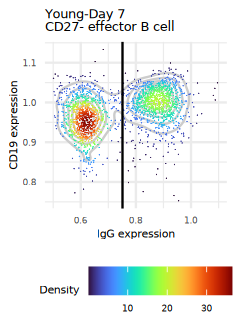

In [70]:
options(repr.plot.width =50/25.4, repr.plot.height = 70/25.4)

p1 <- ggplot(df[df$group == "BR1",], aes(x = IgG, y = CD19)) + 
  geom_density2d(color = "#CCCCCC") +
  geom_point_rast(aes(color = density), stroke = 0, size = 0.3)  + 
  scale_color_viridis(option = 'H', name = "Density", direction = 1) + 
  xlim(0.5, 1.1) +
  theme_minimal() + 
  geom_vline(xintercept = 0.75) + 
  ggtitle("Young-Day 7\nCD27- effector B cell") + 
  xlab(paste("IgG", "expression")) +
  ylab("CD19 expression") +
  theme(text = element_text(size = 6), 
        legend.position = 'bottom')+ 
guides(shape = guide_legend(override.aes = list(size = 0.1)))

p1

Warning message:
“Removed 113 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 113 rows containing missing values or values outside the scale range
(`geom_point()`).”


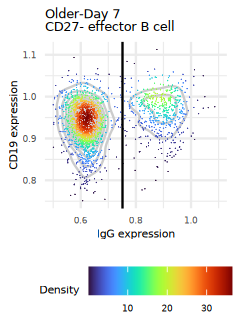

In [71]:
options(repr.plot.width =50/25.4, repr.plot.height = 70/25.4)

p2 <- ggplot(df[df$group == "BR2",], aes(x = IgG, y = CD19)) + 
  geom_density2d(color = "#CCCCCC") +
  geom_point_rast(aes(color = density), stroke = 0, size = 0.3) + 
  scale_color_viridis(option = 'H', name = "Density", direction = 1) + 
  xlim(0.5, 1.1) +
  theme_minimal() + 
  geom_vline(xintercept = 0.75) + 
  ggtitle("Older-Day 7\nCD27- effector B cell") + 
  xlab(paste("IgG", "expression")) +
  ylab("CD19 expression") +
  theme(text = element_text(size = 6), 
        legend.position = 'bottom')+ 
guides(shape = guide_legend(override.aes = list(size = 0.1)))

p2

In [73]:
options(repr.plot.width =90/25.4, repr.plot.height = 70/25.4)

p<-p1+p2
ggsave("FigureH.pdf",p,width=100/25.4 ,height = 70/25.4)

Warning message:
“Removed 108 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 108 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 113 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 113 rows containing missing values or values outside the scale range
(`geom_point()`).”


In [62]:
paste0(round(iso_percentage %>% filter(group == "BR2", isotype == 'IgG') %>% select(P), 
                                   digits = 1), "%")

[1] "22%"